# Predict the Burned Area of Forest Fire with Neural Networks.

# Introduction:
# What are neural networks?
Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.



In [5]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
from imblearn.pipeline import Pipeline
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [6]:
#importing datset

In [7]:
raw_data=pd.read_csv('forestfires.csv')
forest_fire=pd.read_csv('forestfires.csv')
raw_data['size_category'] = forest_fire.size_category
raw_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# About the Dataset
Attribute Information:
# Data Description: Data Available at: http://archive.ics.uci.edu/ml/datasets/Forest+Fires

Forest fires can create ecological problems and endanger human lives and property. Understanding when they occur and what causes them is important for managing them. The data we'll be working with in this is associated with a scientific research paper on predicting the occurrence of forest fires in Portugal using modeling techniques. The focus will not only be about modelling for this project, but also on visualizing it. There will also be exploratory analysis on the data to better understand it and to find any relationships that might be present in it.

### Here are descriptions of the variables in the data set and the range of values for each taken from the research paper:
### X: X-axis spatial coordinate within the Montesinho park map: 1 to 9
### Y: Y-axis spatial coordinate within the Montesinho park map: 2 to 9
### month: Month of the year: 'jan' to 'dec'
### day: Day of the week: 'mon' to 'sun'
### FFMC: Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
DMC: Duff Moisture Code index from the FWI system: 1.1 to 291.3
### DC: Drought Code index from the FWI system: 7.9 to 860.6
### ISI: Initial Spread Index from the FWI system: 0.0 to 56.10
### temp: Temperature in Celsius degrees: 2.2 to 33.30
## RH: Relative humidity in percentage: 15.0 to 100
## wind: Wind speed in km/h: 0.40 to 9.40
## rain: Outside rain in mm/m2 : 0.0 to 6.4
# area: The burned area of the forest (in ha): 0.00 to 1090.84

# Data Exploration
A Binary Classification Task as our classes to predict is 'Yes' or 'No' a Binomial Distribution

In [8]:
# print shape of dataset with rows and columns
print(raw_data.shape)
# print top 5 records
raw_data.head()

(517, 31)


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [9]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

All the columns data types are correctly identified
In Data Analysis we will analyze to find out the below stuff
Missing values
All the Numerical Variables
Distribution of the Numerical Variables
Categorical Variables
Cardinality of Categorical Variables
Outliers
## Relationshop between independent and dependent feature (Target)

In [12]:
raw_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

# Duplicated Values
# print the duplicated rows

In [13]:
raw_data[raw_data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [14]:
raw_data[raw_data.duplicated()].shape

(8, 31)

# Types of variables
In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.

First of all, I will explore Numerical variables.

# Numerical Variables

In [15]:
# List of Numerical Variables
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
raw_data[numerical_features].head()

Number of numerical variables: 28


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


# Discrete Feature
### Numerical variables are usually of 2 types
### Continuous variable and discrete variable

In [16]:
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 21


CONTINOUES VARIABLES

In [17]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


CATOGORICAL VARIABLES

In [18]:
# find categorical variables

categorical = [var for var in raw_data.columns if raw_data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [19]:
# view frequency counts of values in categorical variables

for var in categorical:

    print(raw_data[var].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
small    378
large    139
Name: size_category, dtype: int64


In [20]:
# view frequency distribution of categorical variables

for var in categorical:

    print(raw_data[var].value_counts()/np.float(len(raw_data)))

aug    0.355899
sep    0.332689
mar    0.104449
jul    0.061896
feb    0.038685
jun    0.032882
oct    0.029014
apr    0.017408
dec    0.017408
jan    0.003868
may    0.003868
nov    0.001934
Name: month, dtype: float64
sun    0.183752
fri    0.164410
sat    0.162476
mon    0.143133
tue    0.123791
thu    0.117988
wed    0.104449
Name: day, dtype: float64
small    0.731141
large    0.268859
Name: size_category, dtype: float64


Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [21]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(raw_data[var].unique()), ' labels')

month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


In [22]:
raw_data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


# Data Visualization

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area'),
  Text(9.5, 0, 'dayfri'),
  Text(10.5, 0, 'daymon'),
  Text(11.5, 0, 'daysat'),
  Text(12.5, 0, 'daysun'),
  Text(13.5, 0, 'daythu'),
  Text(14.5, 0, 'daytue'),
  Text(15.5, 0, 'daywed'),
  Text(16.5, 0, 'monthapr'),
  Text(17.5, 0, 'monthaug'),
  Text(18.5, 0, 'monthdec'),
  Text(19.5, 0, 'monthfeb'),
  Text(20.5, 0, 'monthjan'),
  Text(21.5, 0, 'monthjul'),
  Text(22.5, 0, 'monthjun'),
  Text(23.5, 0, 'monthmar'),
  Text(24.5, 0, 'monthmay'),
  Text(25.5, 0, 'monthnov'),
  Text(26.5, 0, 'monthoct'),
  Text(27.5, 0, 'monthsep')])

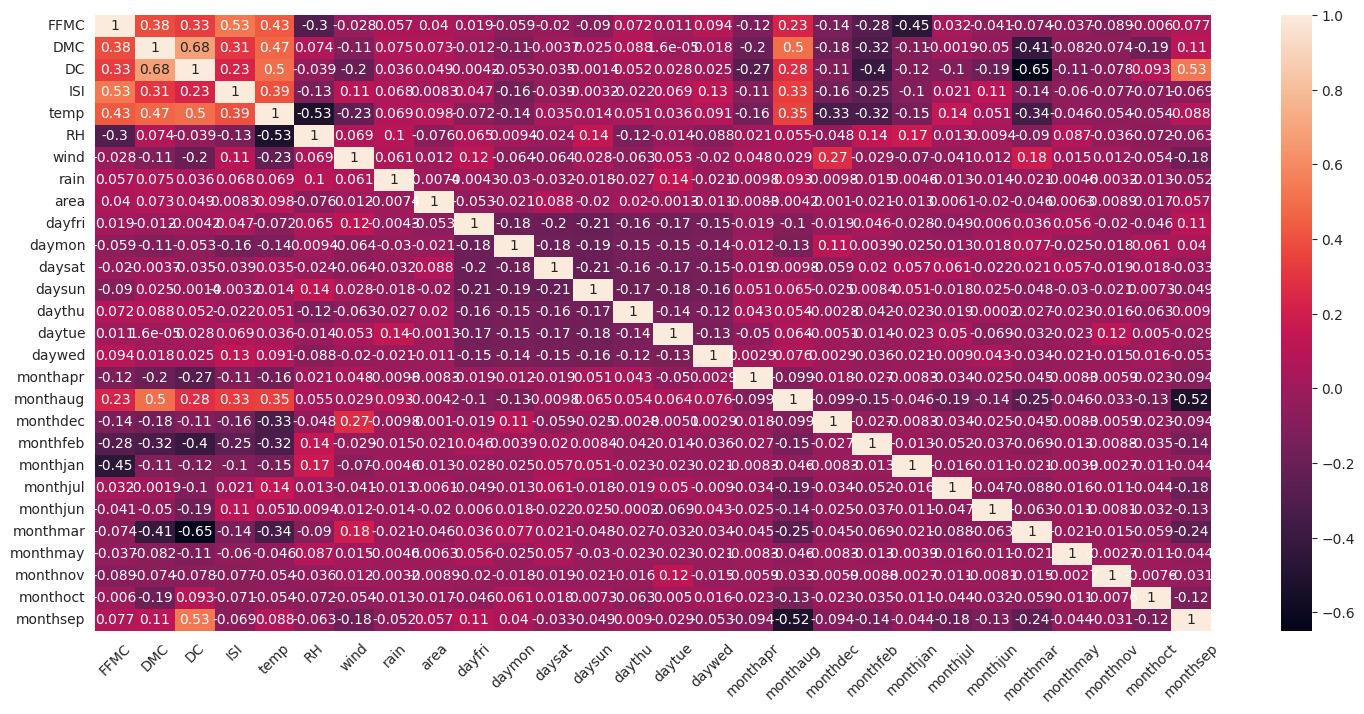

In [23]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(raw_data.corr(), annot=True);
plt.xticks(rotation=45)

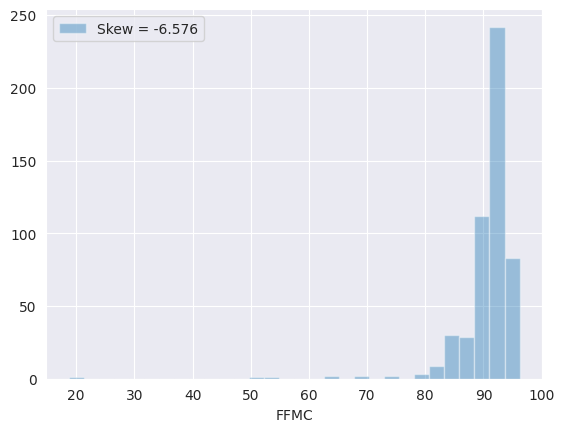

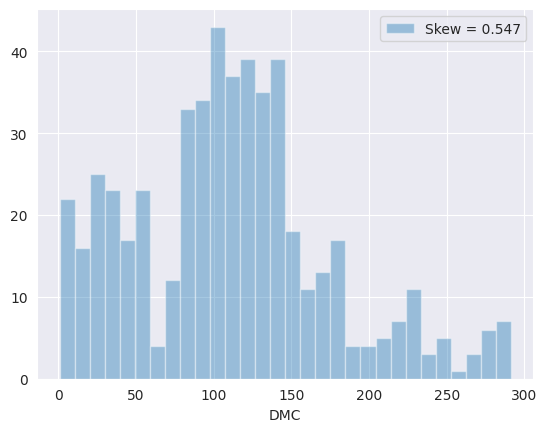

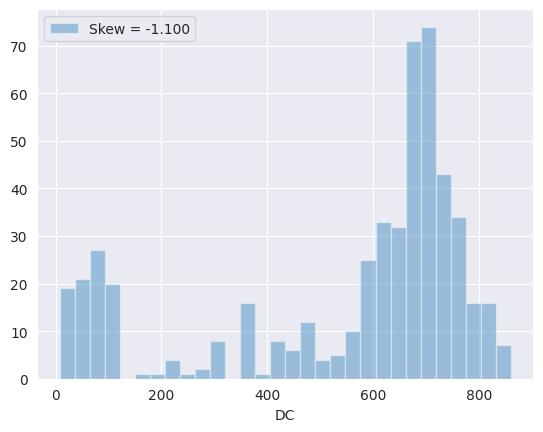

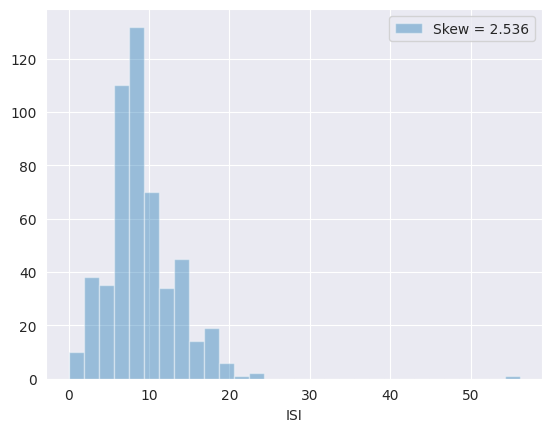

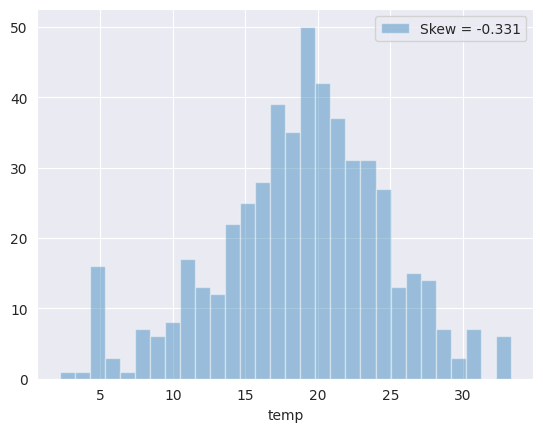

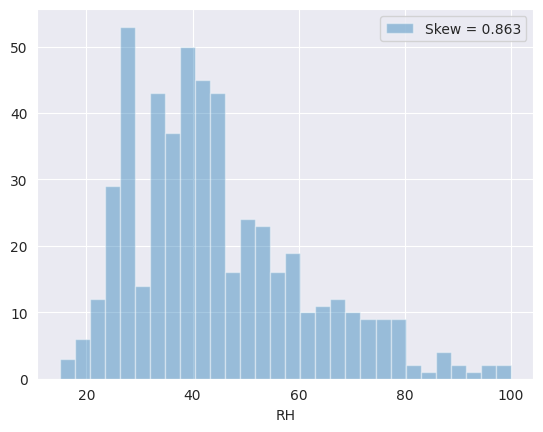

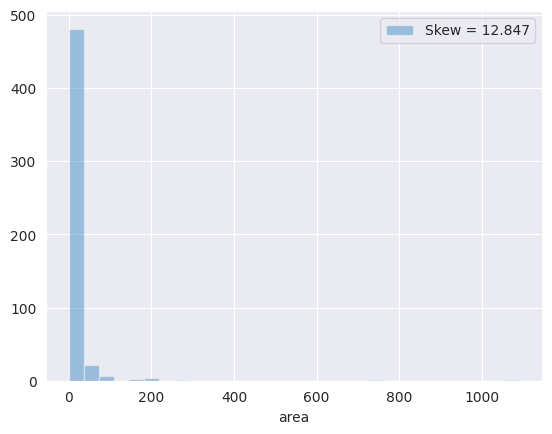

In [24]:
for feat in continuous_feature:
    skew = raw_data[feat].skew()
    sns.distplot(raw_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [25]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
         # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(raw_data[continuous_feature]))))

The dataset contains 3 observations with more than 2 outliers


In [26]:
continuous_feature

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']

# Outliers Detection

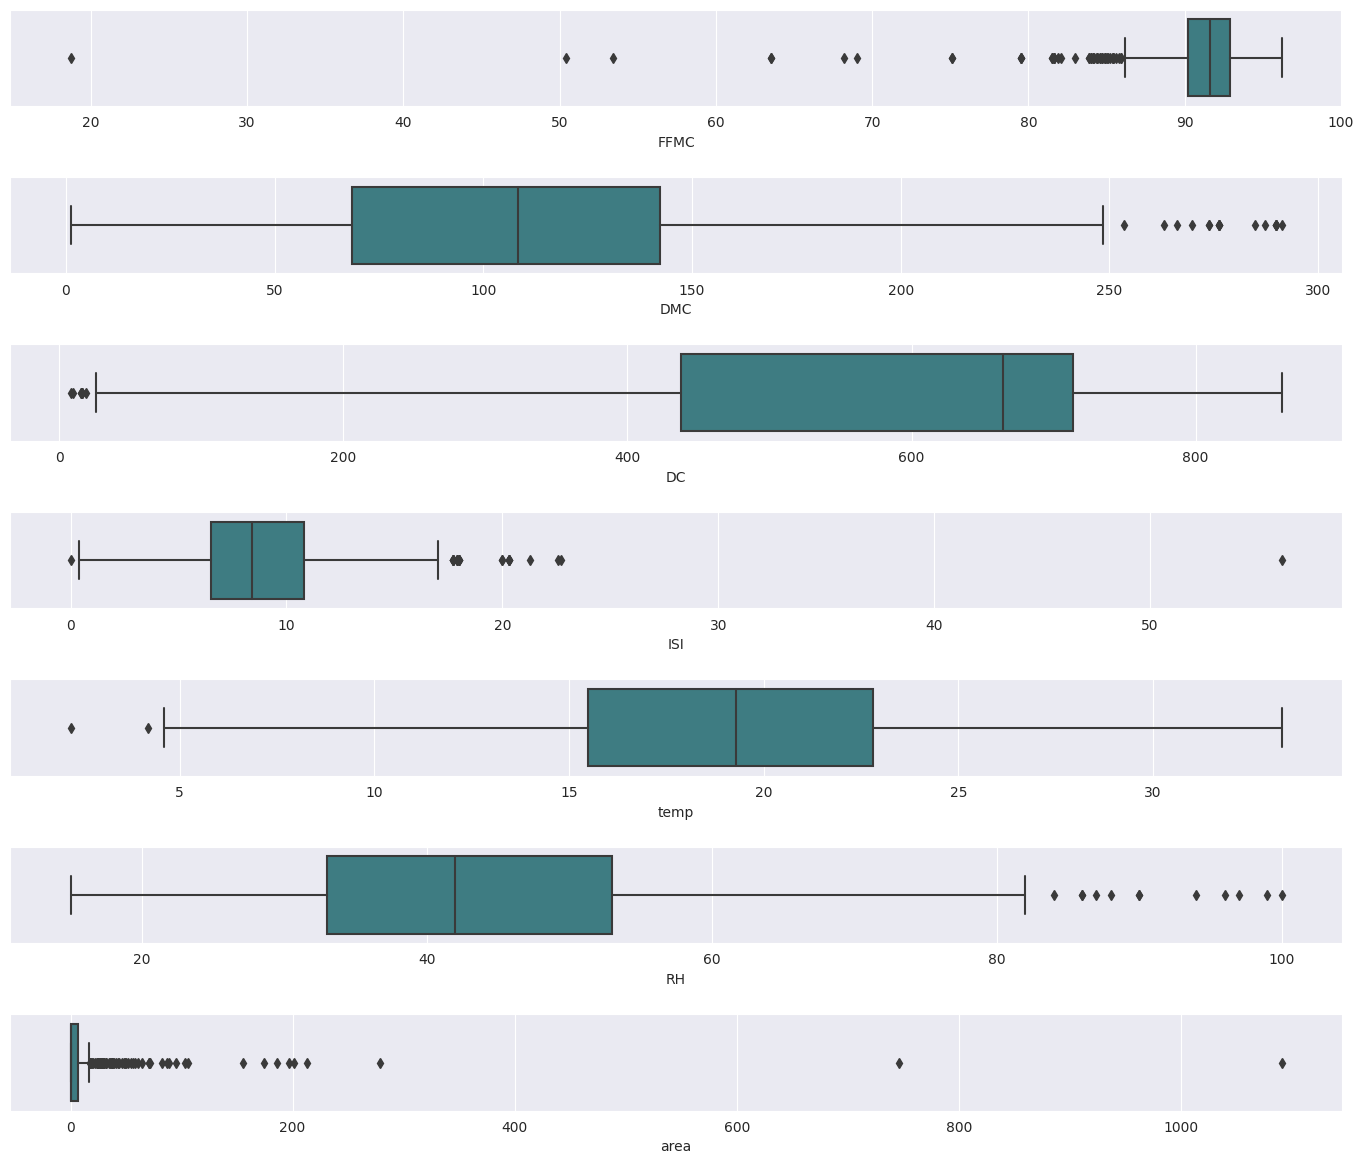

In [27]:
ot=raw_data.copy()
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building
### After Log-Transformation

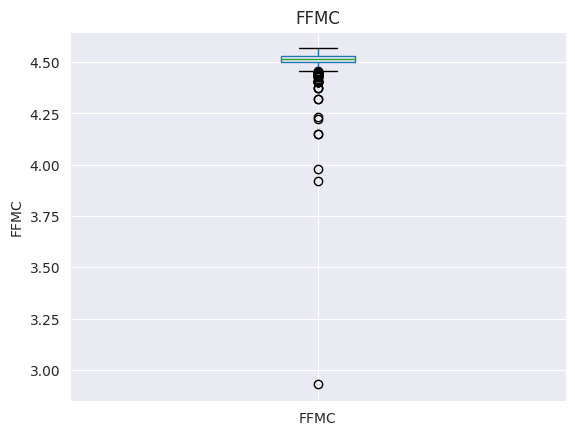

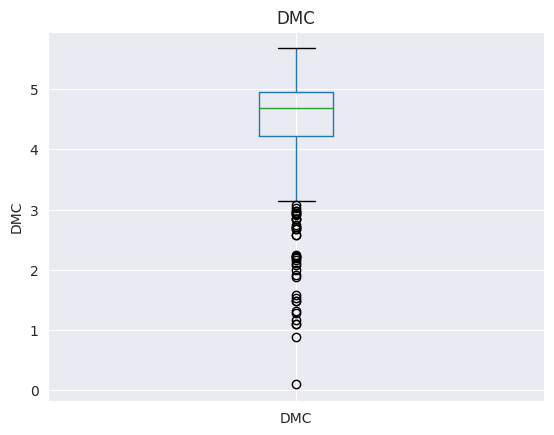

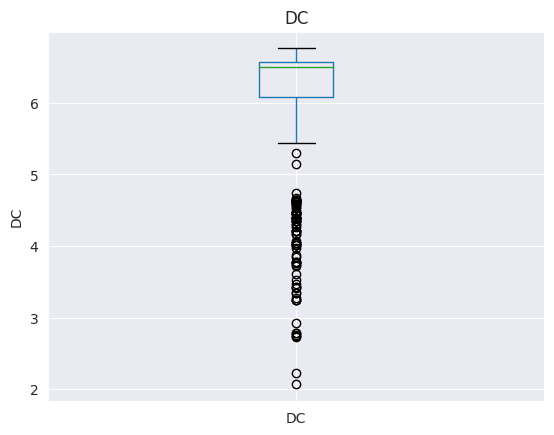

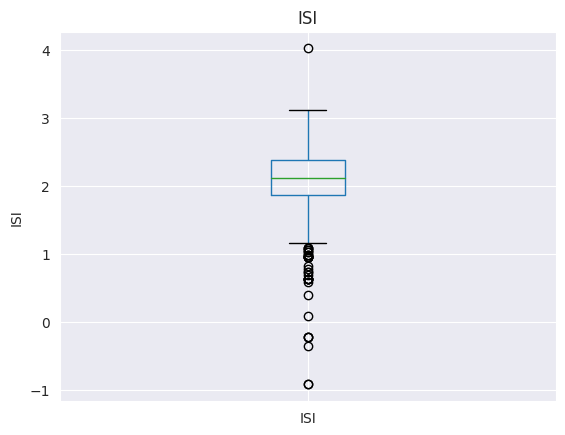

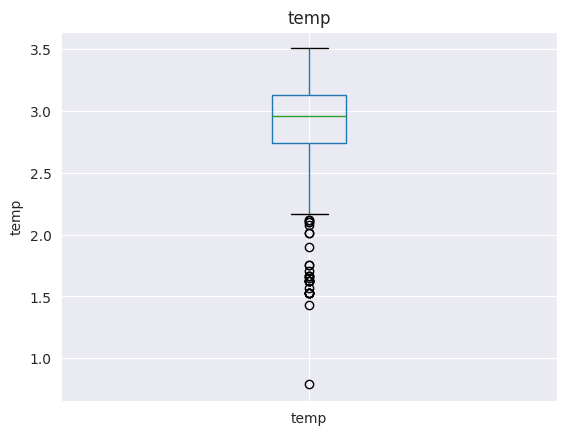

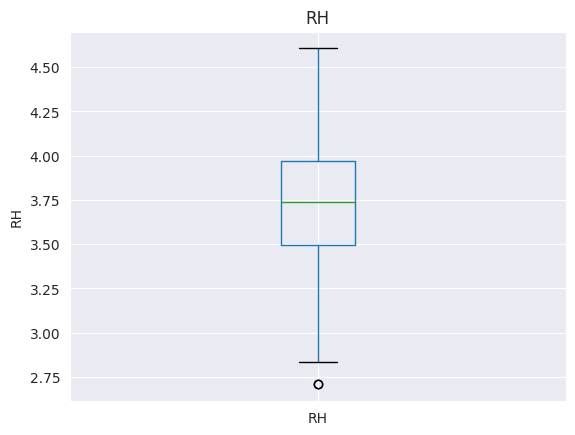

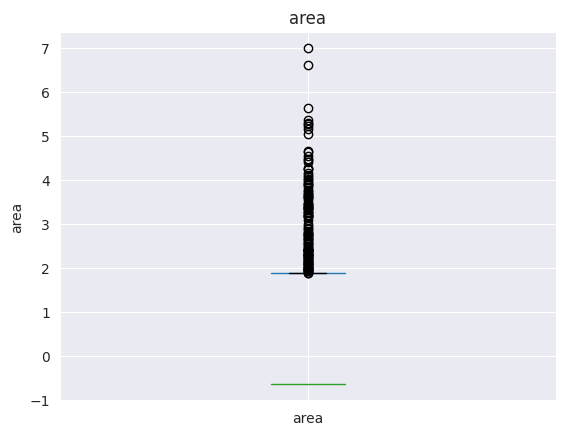

In [28]:
for feature in continuous_feature:
    data=raw_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

## Visualize the distribution of 'Area' and taking insights

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


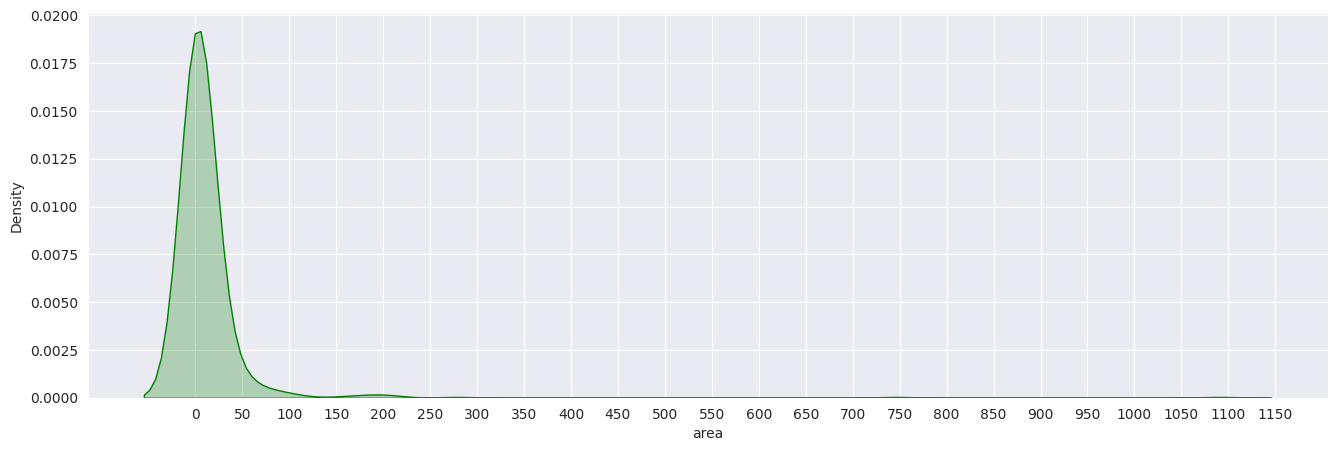

In [29]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(raw_data['area'].skew()))
print("Kurtosis: {}".format(raw_data['area'].kurtosis()))
ax = sns.kdeplot(raw_data['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

Few observations:
### The data is highly skewed with a value of +12.84 and huge kurtosis value of 194.

### It even tells you that majority of the forest fires do not cover a large area, most of the damaged area is under 50 hectares of land.

### We can apply tranformation to fix the skewnesss and kurtosis, however we will have to inverse transform before submitting the output.

### Outlier Check: There are 4 outlier instances in our area columns but the questions is should we drop it or not? (Will get back to this in the outlier treatment step)

In [30]:
categorical_features=[feature for feature in raw_data.columns if raw_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
raw_data[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small


In [31]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(raw_data[feature].unique()),feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day
2 number of unique categories in feature named size_category


In [32]:
# Decide which categorical variables you want to use in model
for feature in raw_data.columns:
    if raw_data[feature].dtypes == 'object':# in pandas it is object
        unique_cat = len(raw_data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(raw_data[feature].value_counts())
        print()

Feature 'month' has 12 unique categories
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Feature 'day' has 7 unique categories
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

Feature 'size_category' has 2 unique categories
small    378
large    139
Name: size_category, dtype: int64



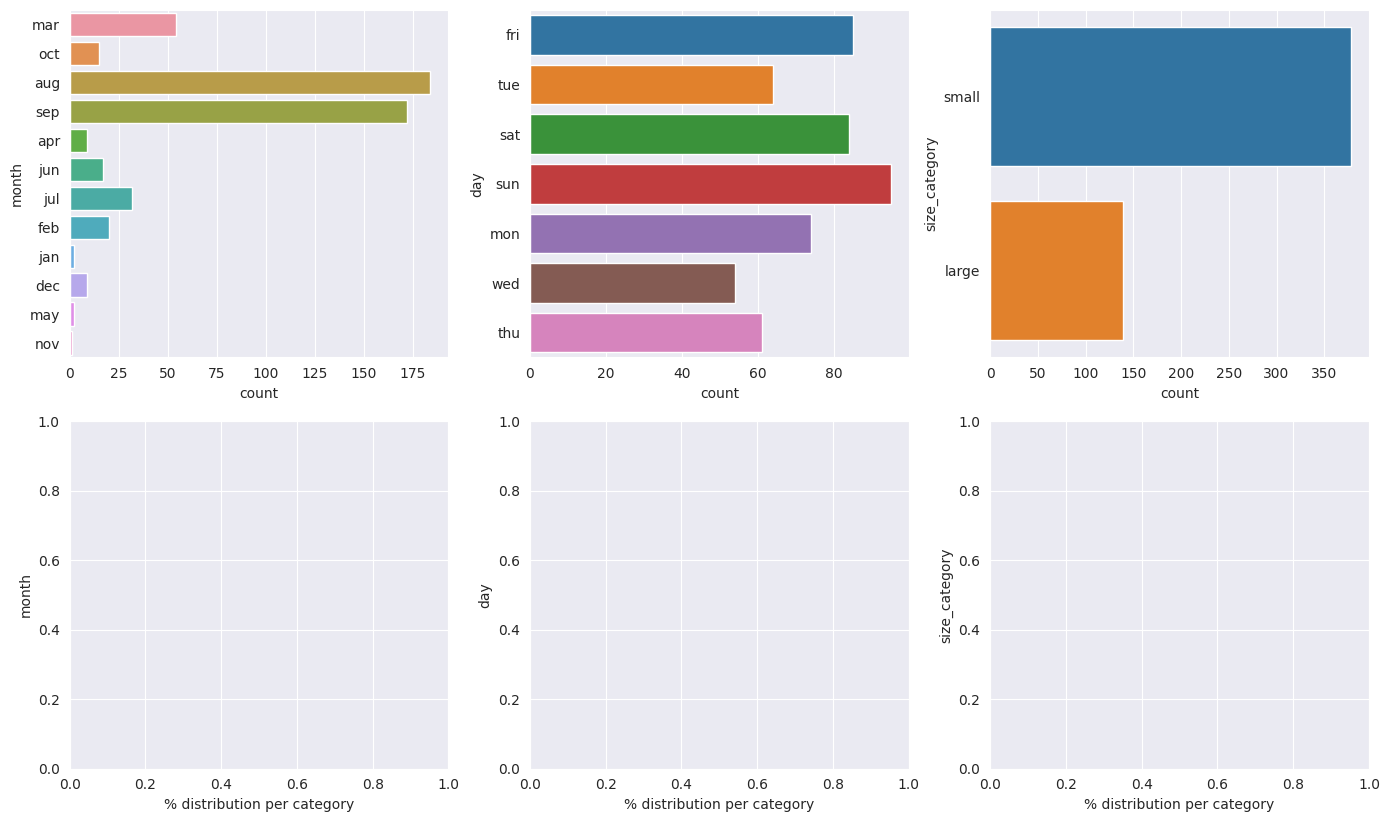

In [33]:
# analyzing categorical columns
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data=raw_data,y=col)
    plt.subplot(3,3,i+3)
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

### Bivariate Analysis for all variables in the dataset

In [34]:
print(raw_data['area'].describe(),'\n')
# A categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
df=raw_data.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,damage_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,No damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,No damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,small,No damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,small,No damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,small,No damage


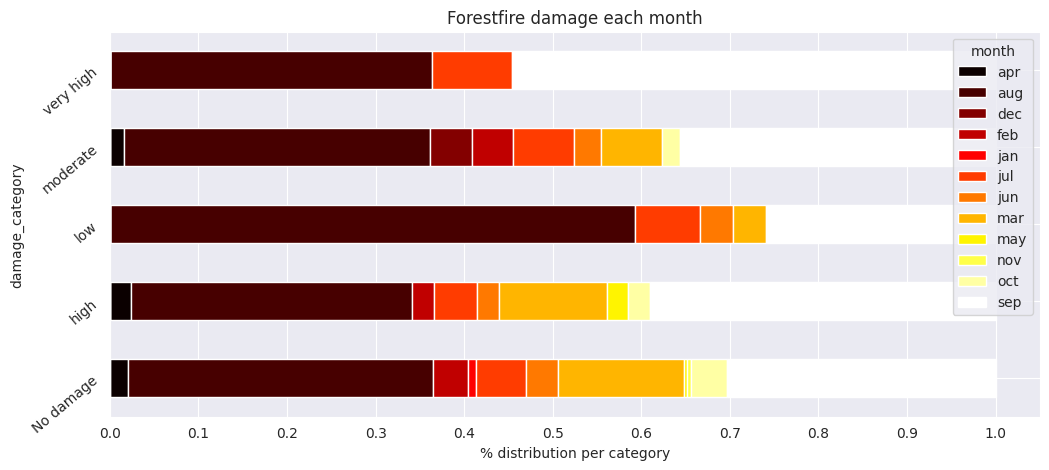

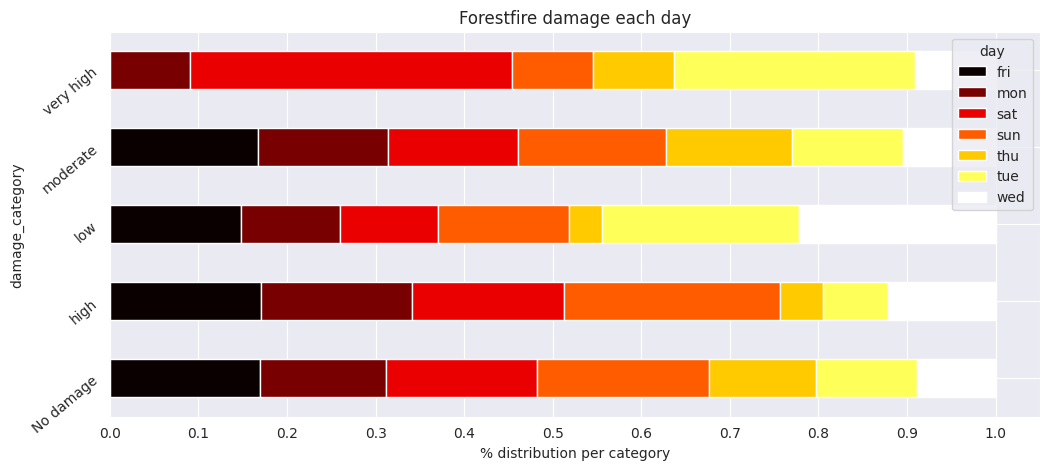

In [35]:
for col in categorical_features:
    if col!="size_category":
        cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
        cross.plot.barh(stacked=True,rot=40,cmap='hot',figsize=(12, 5))
        plt.xlabel('% distribution per category')
        plt.xticks(np.arange(0,1.1,0.1))
        plt.title("Forestfire damage each {}".format(col))

plt.show()

[Text(0.5, 1.0, 'Month Vs Temp Barplot'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Temperature')]

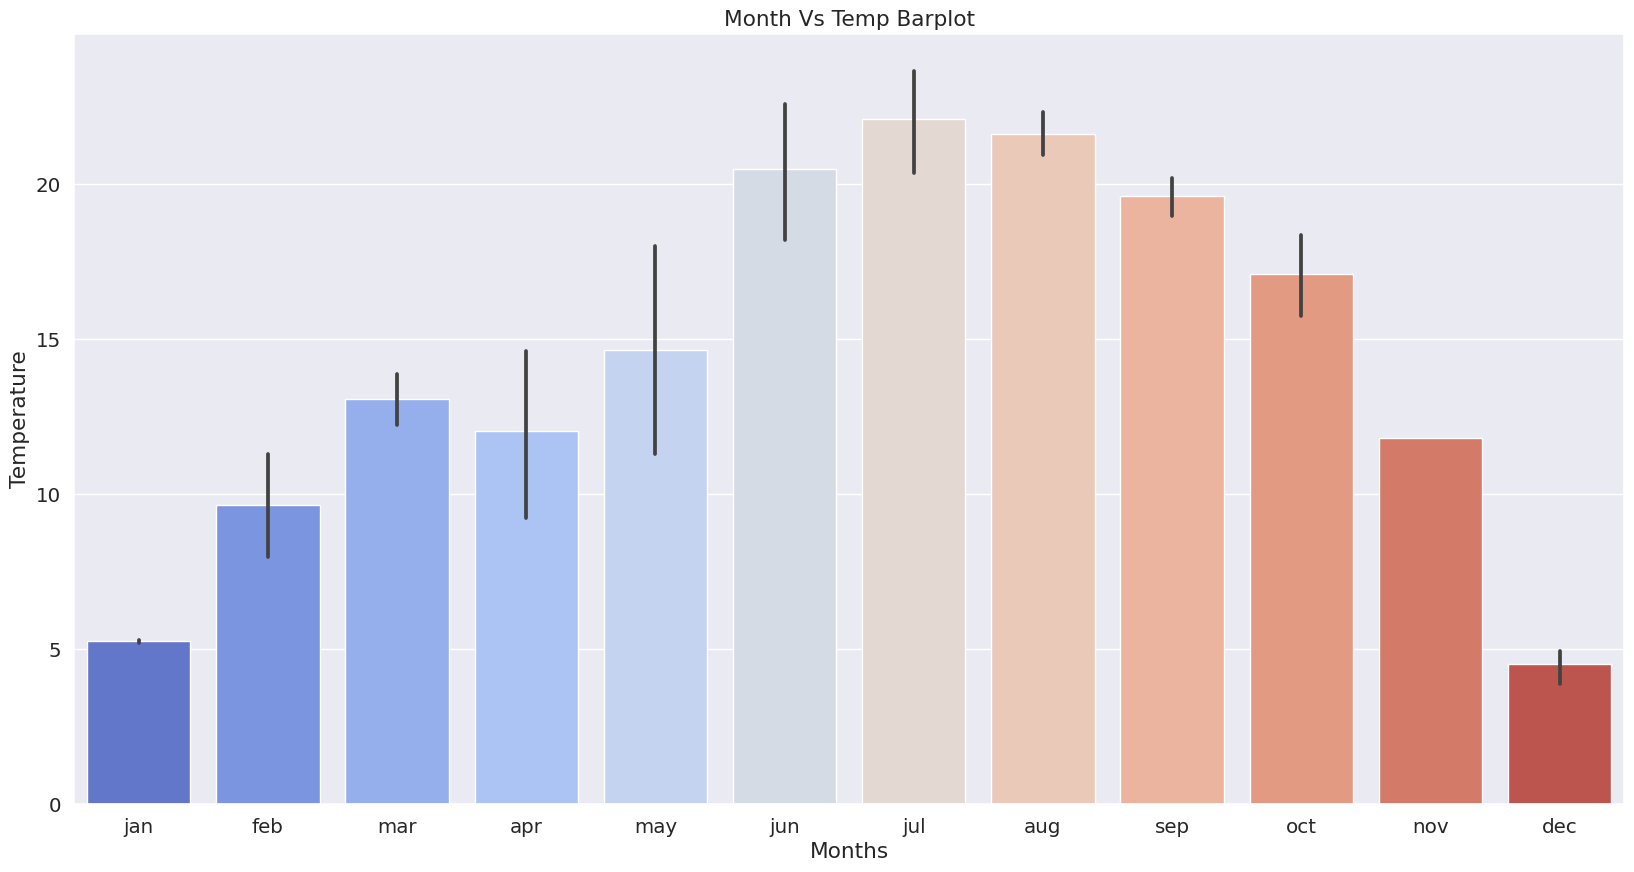

In [36]:
# setting parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = raw_data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'coolwarm');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature")

Text(0.5, 1.0, 'Burnt area in different regions of the park')

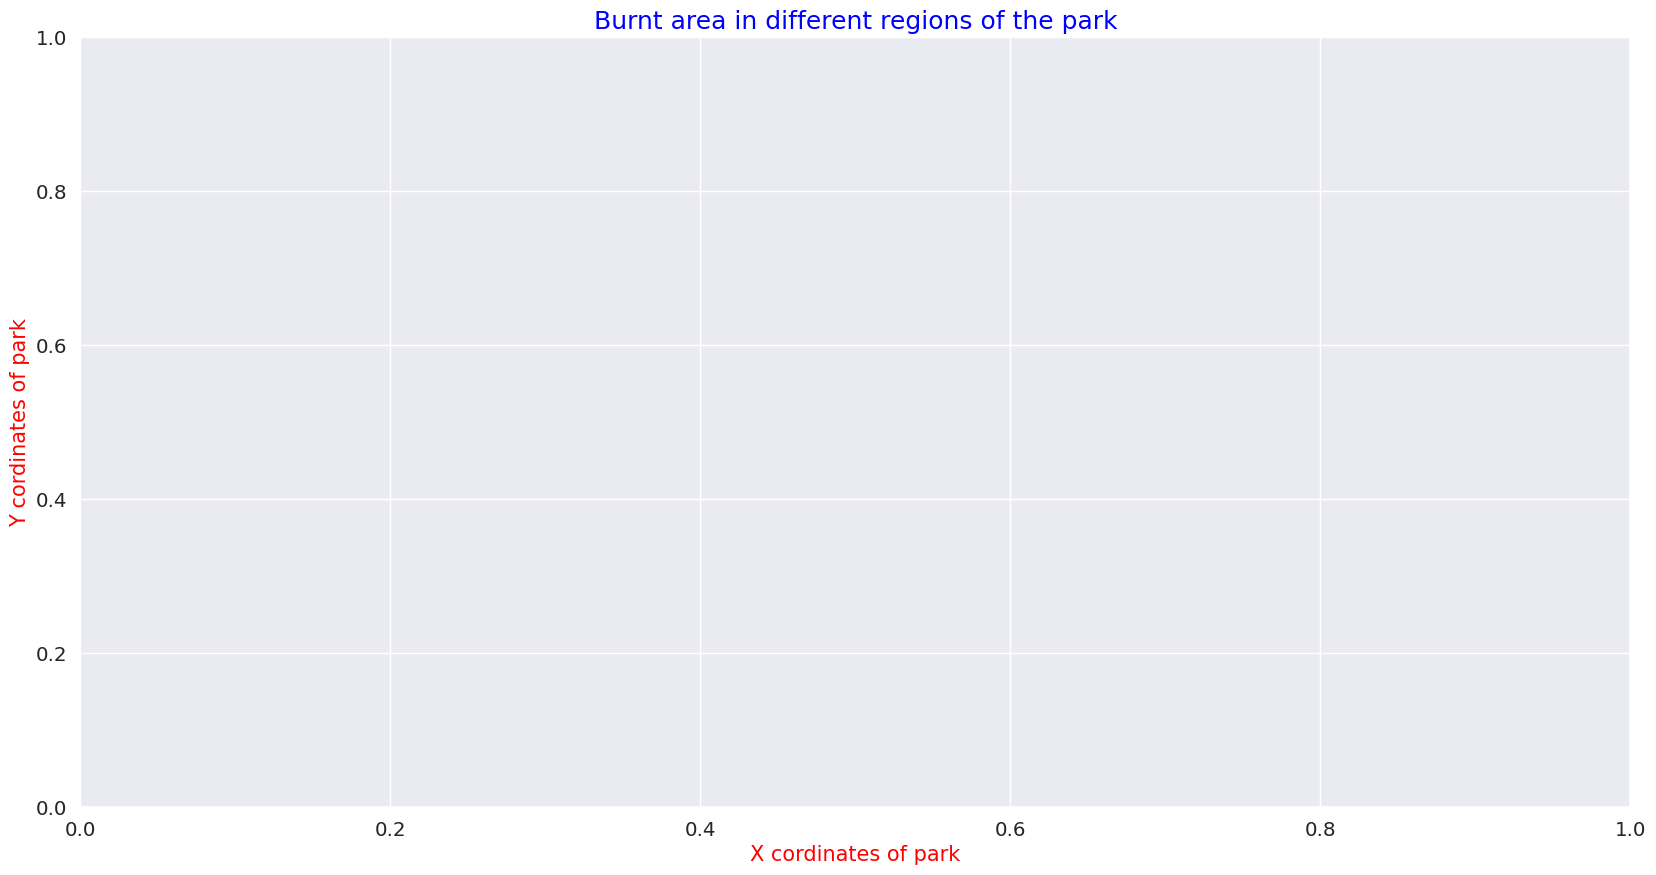

In [37]:
# Analysis of Burnt area based on spatial cordinates(X,Y)
plt.xlabel('X cordinates of park',color='red',fontsize=15)
plt.ylabel('Y cordinates of park',color='red',fontsize=15)
plt.title('Burnt area in different regions of the park',color='blue',fontsize=18)

Observations:
From the above scatter plot of 9X9 representation of park we can see that there are multiple hotspots for burnt area.

The cordinates (6,5) show intense burnt area.

By applying maximum and minimum function on area columns.

. we can deduce the min burned area is at (1,2) cordinates whereas
. max burned area is at (9,9) cordinates

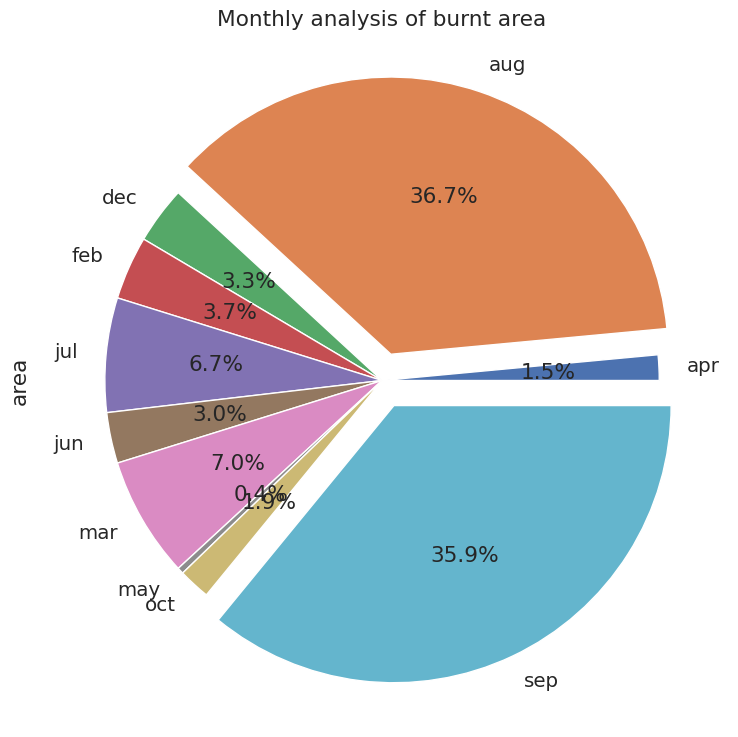

In [38]:
# monthly analysis of burnt area, where the condition is: area>0
areaburnt=raw_data[raw_data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()

### Visualize the Large Forest Fire Size rate by month

In [39]:
df1=raw_data.copy()
order={'month':{'jan':'January','feb':'February','mar':'March','apr':'April','may':'May','jun':'June','jul':'July','aug':'August','sep':'September','oct':'October','nov':'November','dec':'December'}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month.drop('month',axis = 1,inplace = True)
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
month

,% Small Forest Fire,% Large Forest Fire
January,100.000000,0.000000
February,70.000000,30.000000
March,77.777778,22.222222
April,77.777778,22.222222
May,50.000000,50.000000
June,82.352941,17.647059
July,71.875000,28.125000
August,76.630435,23.369565
September,70.348837,29.651163
October,73.333333,26.666667


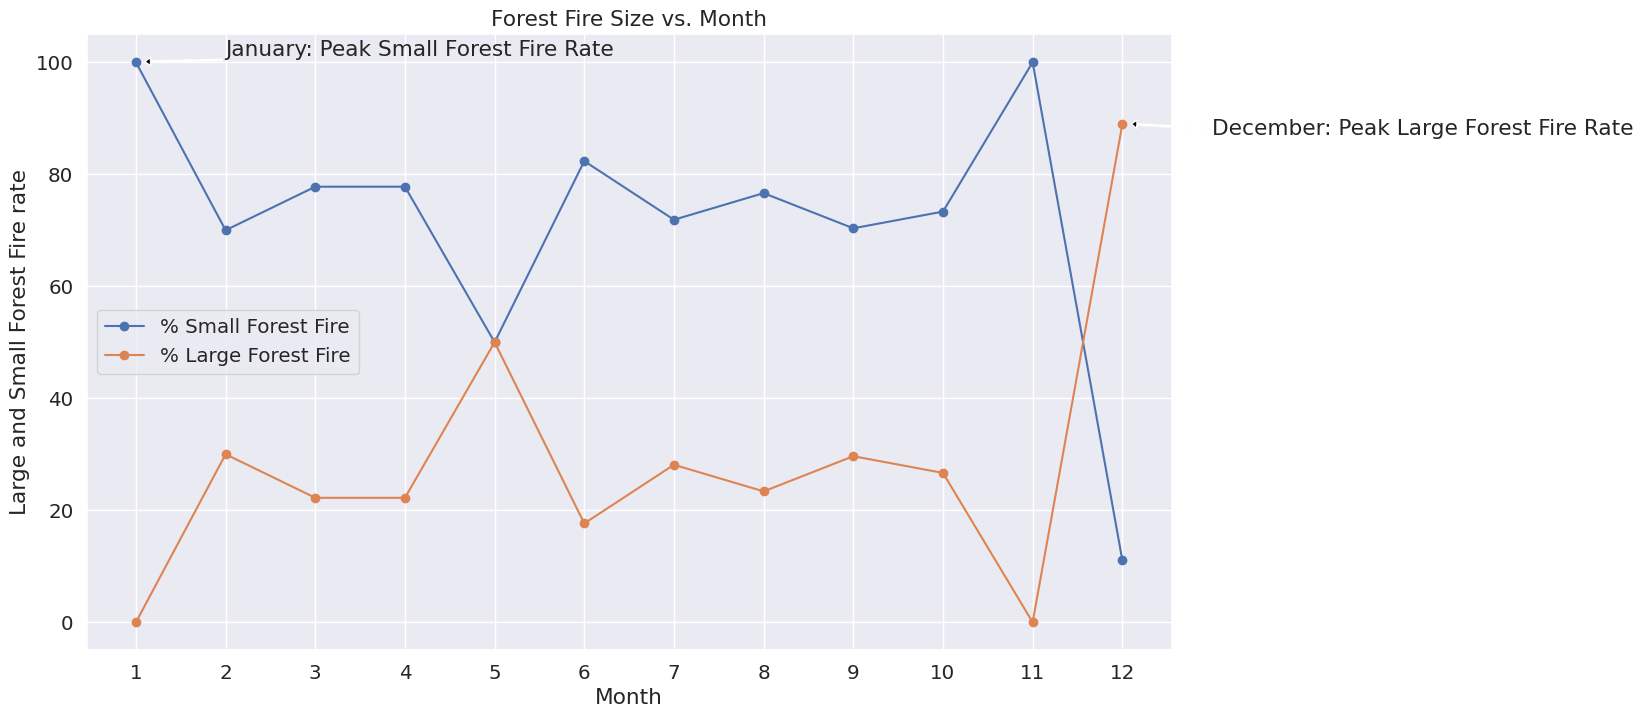

In [40]:
# Step 4: Change 'month' from words to numbers for easier analysis
df1=raw_data.copy()
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month.drop('month',axis = 1,inplace = True)
month['Month'] = ['August','September','March','July','February','June','October','April','December','January','May','November']
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
plot_month = month[['% Small Forest Fire','% Large Forest Fire']].plot(kind ='line',
                                                          figsize = (14,8),
                                                          marker = 'o')

plt.title('Forest Fire Size vs. Month')
plt.ylabel('Large and Small Forest Fire rate')
plt.xlabel('Month')
ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of Small fire rate
y = month['% Small Forest Fire'].max()
x = month['% Small Forest Fire'].idxmax()
plt.annotate('January: Peak Small Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of large fire rate
y = month['% Large Forest Fire'].max()
x = month['% Large Forest Fire'].idxmax()
plt.annotate('December: Peak Large Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

In [41]:
data_ = raw_data.copy()
data_.drop('size_category',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0


Text(0.5, 1.0, 'Correlation with Forest Fire Size Category \n')

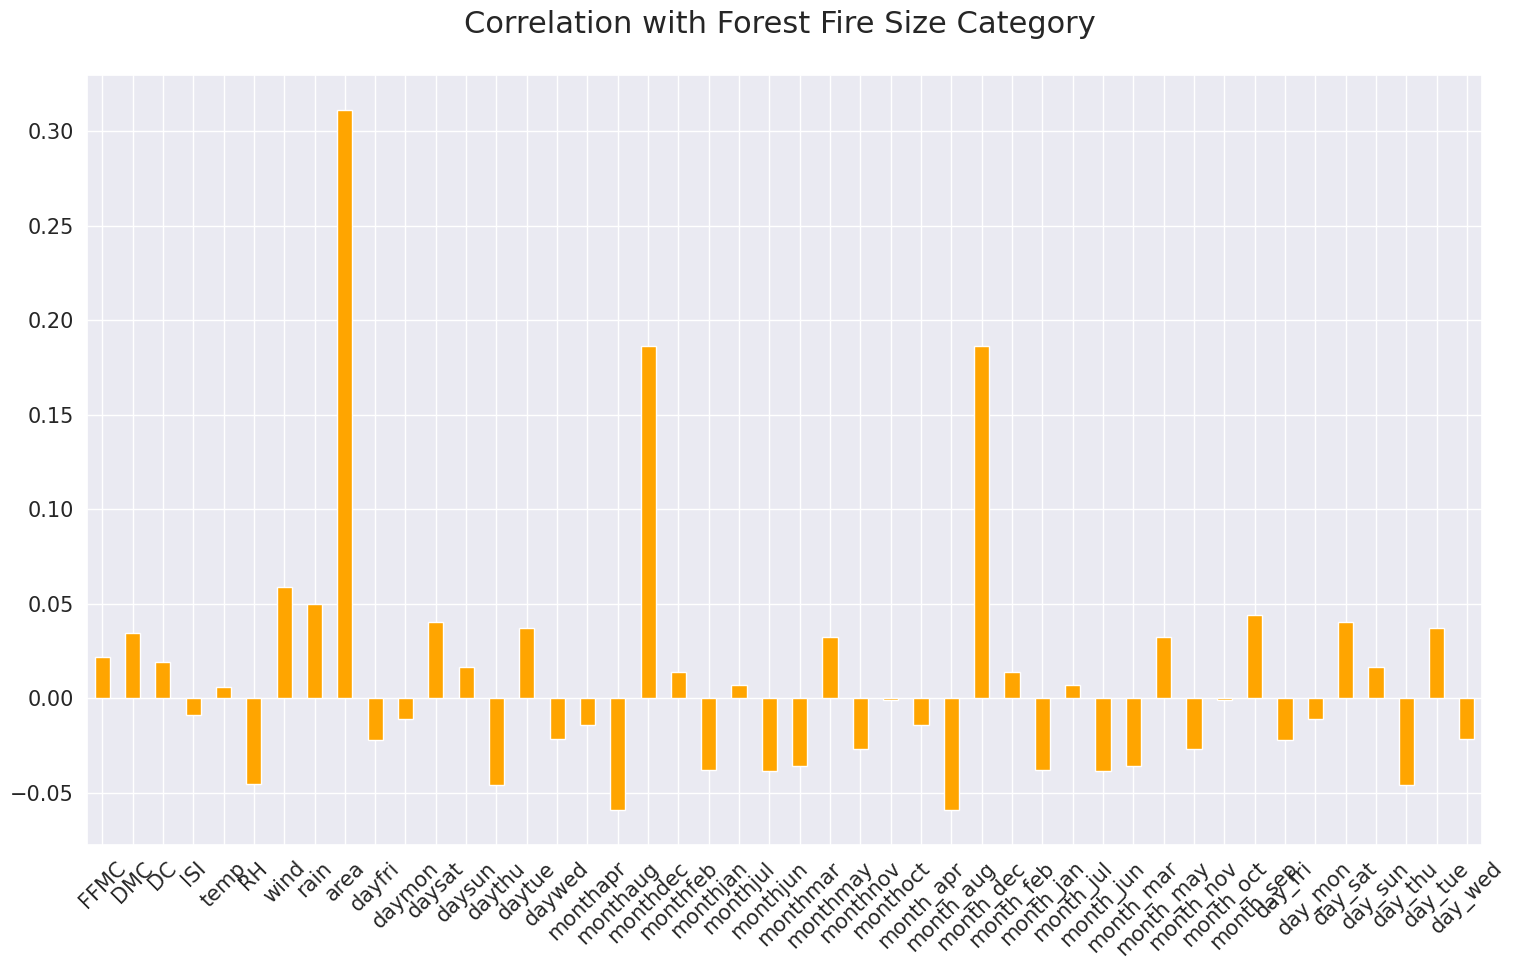

In [42]:
df=raw_data.copy()
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)

correlations = data_.corrwith(df.size_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Forest Fire Size Category \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

Analysis of the response column
It is very important to look at the response column, which holds the information, which we are going to predict. In our case we should look at 'size_category' column and compare its values to other columns. First of all we should look at the category 'small' and 'large' in the Dependent column 'size-category'.

In [44]:
raw_data.size_category.unique()

array(['small', 'large'], dtype=object)

In [45]:
countsizesmall = len(raw_data[raw_data.size_category == 'small'])
countsizelarge = len(raw_data[raw_data.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(raw_data.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(raw_data.size_category))*100)))

Percentage of Small Forest Fire Size: 73.11%
Percentage of Large Foreset Fire Size: 26.89%


In [46]:
raw_data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

Text(0.5, 1.0, 'Foeest Fire Size Category')

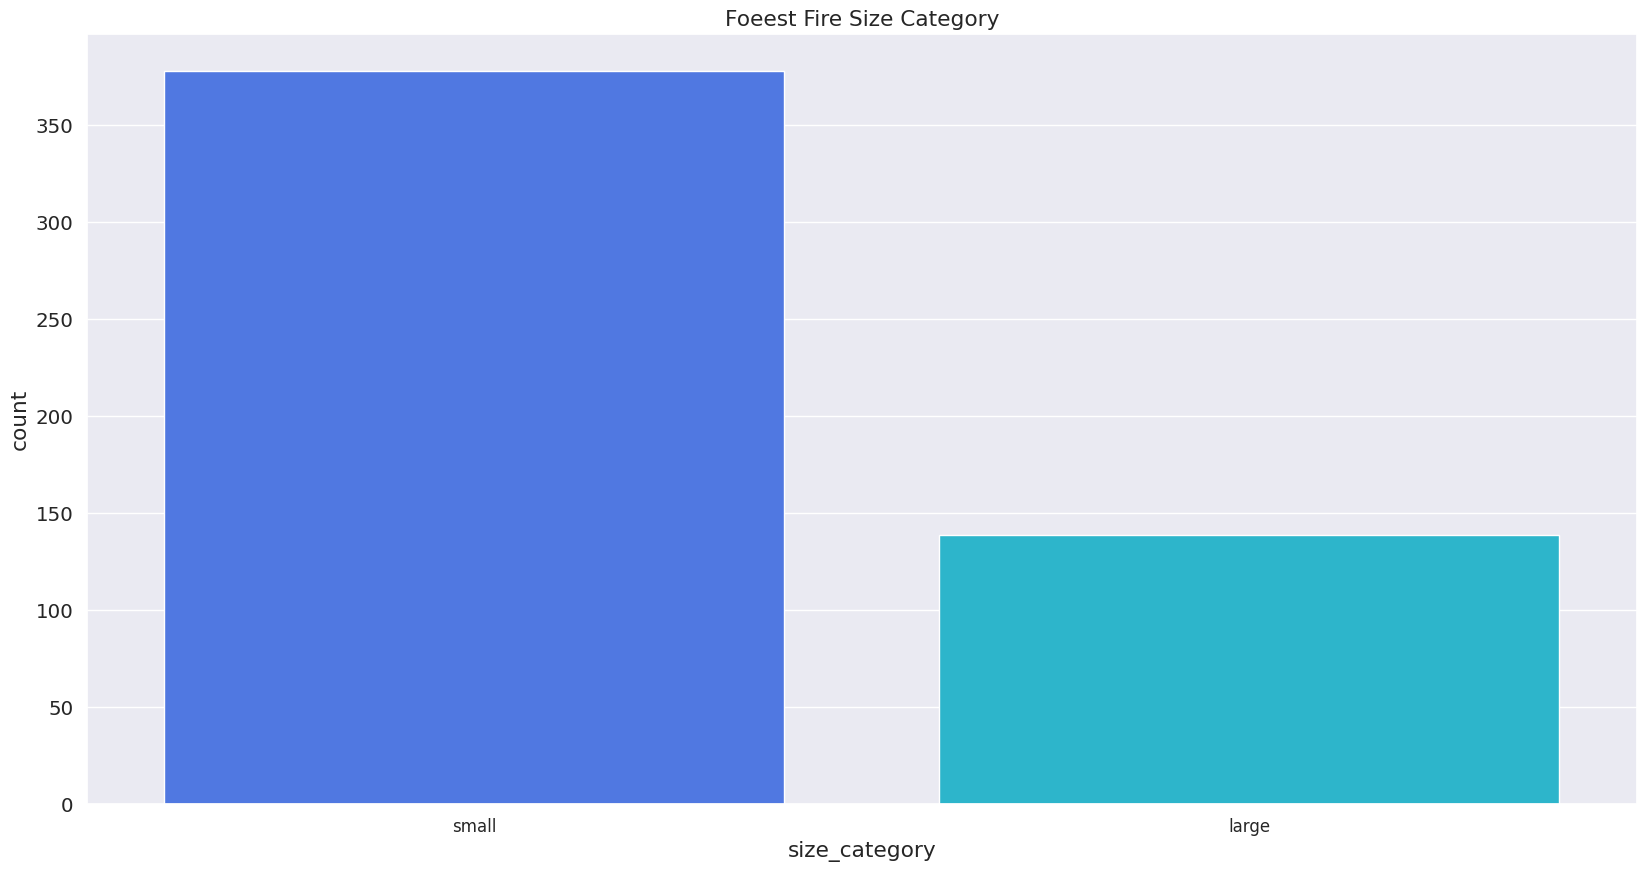

In [47]:
pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data=raw_data, palette = pal,
              order=raw_data['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Foeest Fire Size Category')

ValueError: ignored

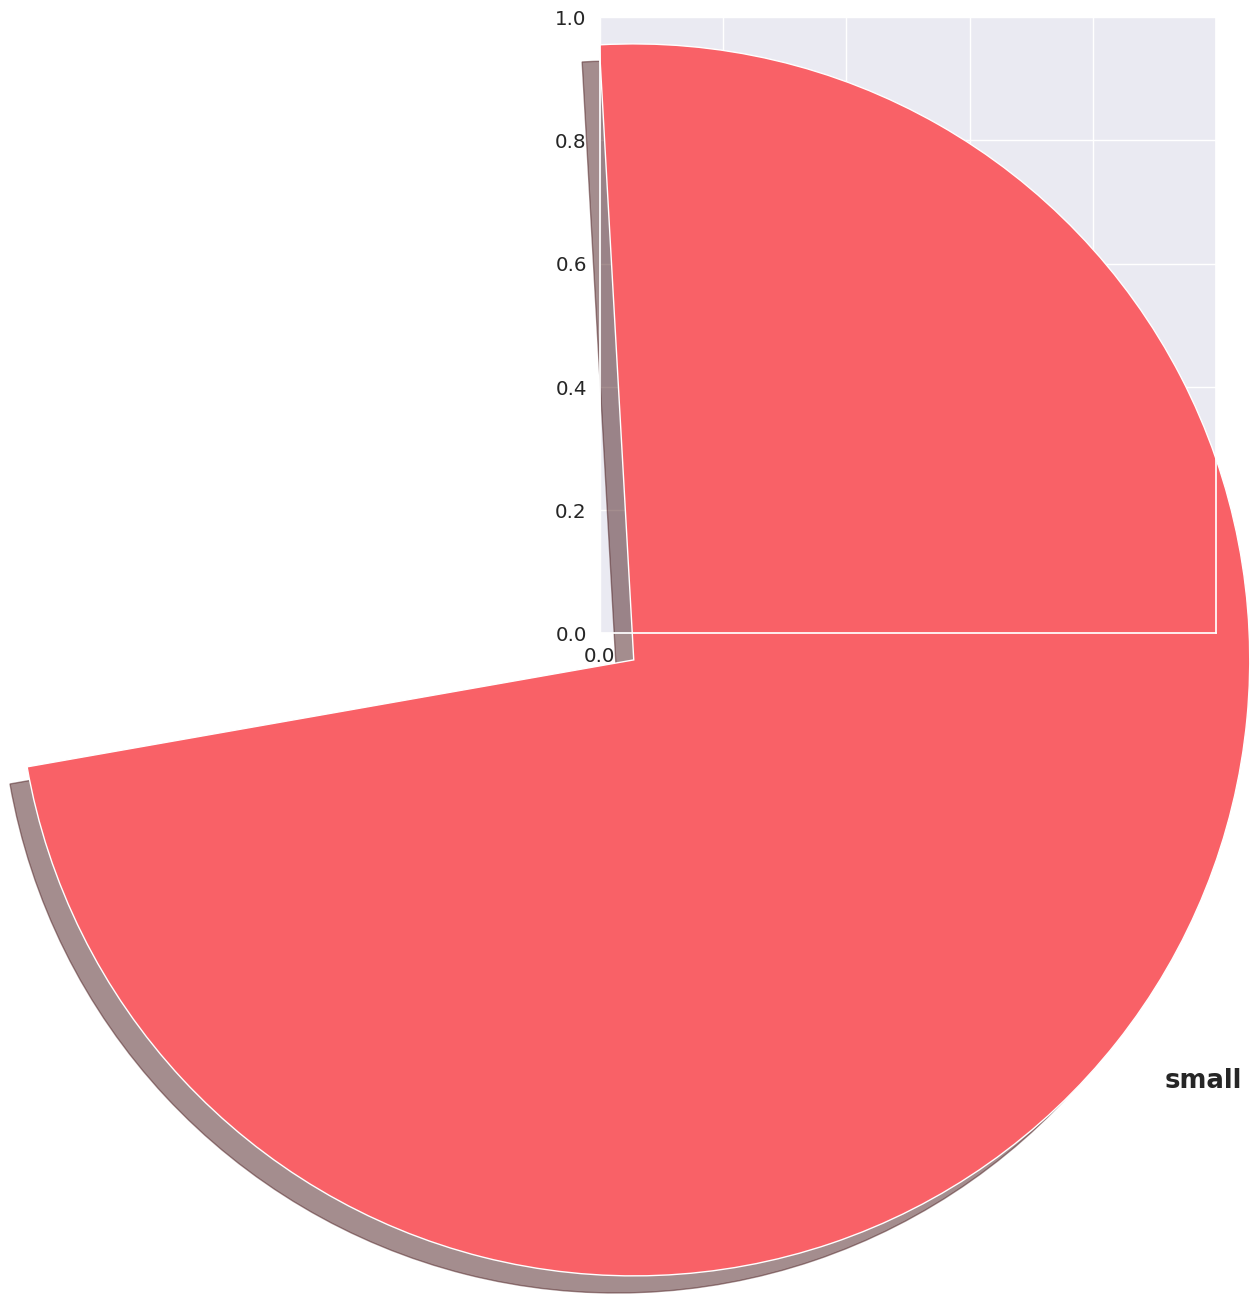

In [48]:
plt.figure(figsize = (12,8))
plt.pie(raw_data['size_category'].value_counts(),
       labels=raw_data.size_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

ValueError: ignored

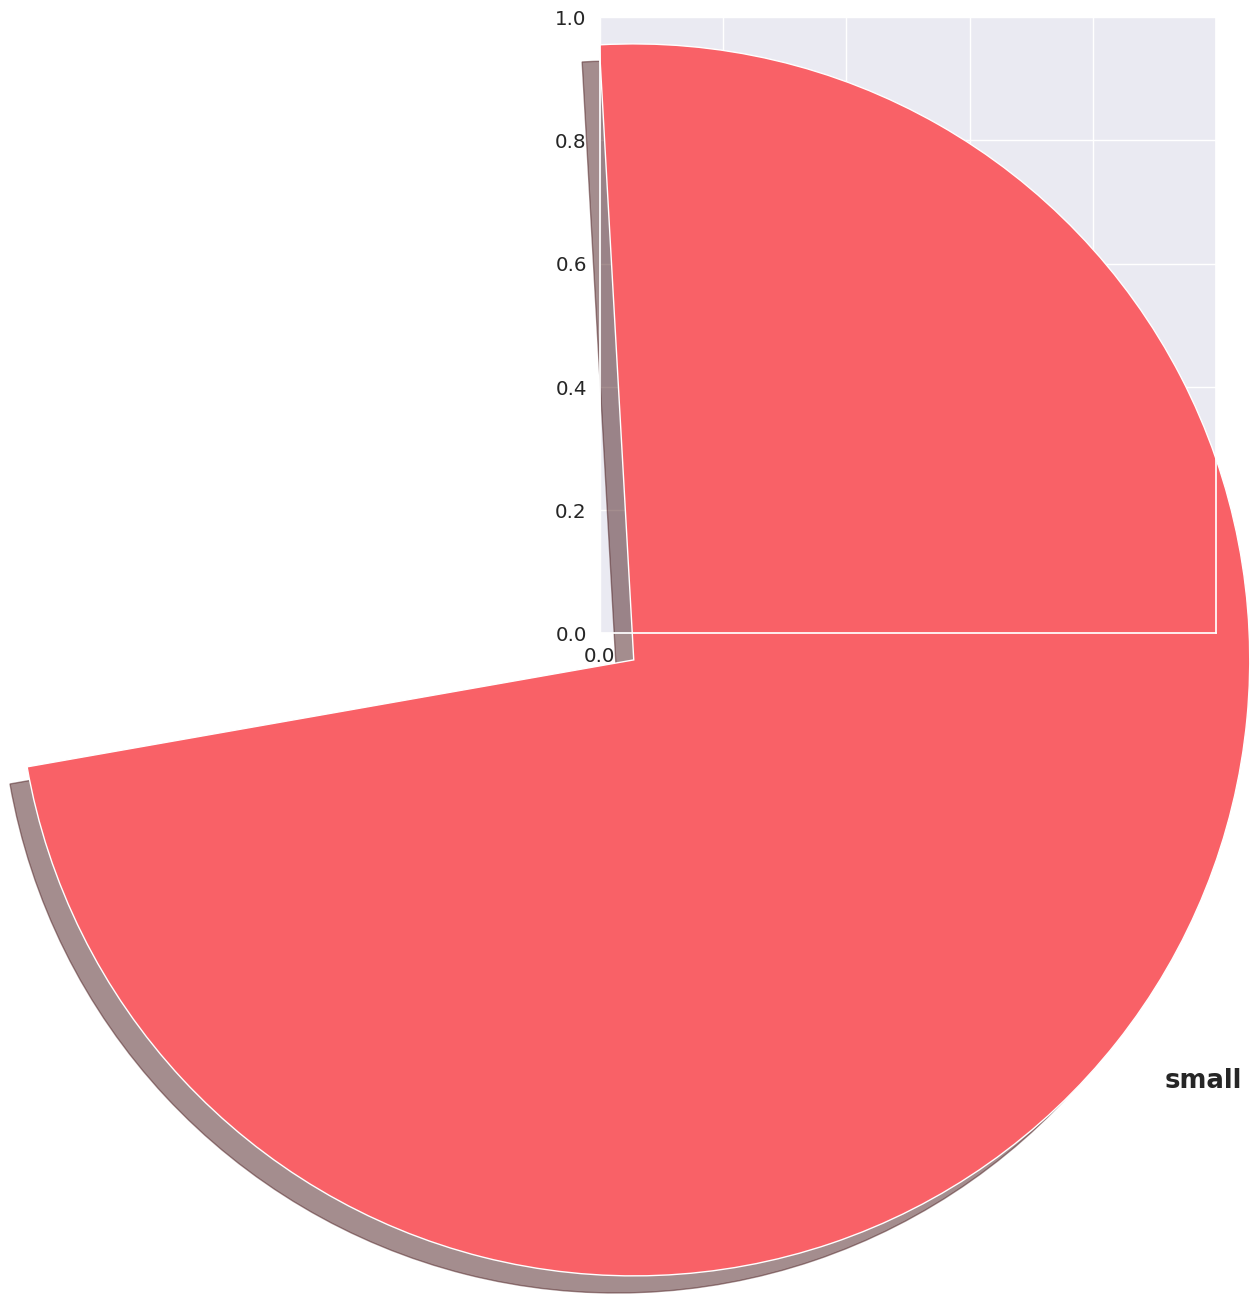

In [49]:
plt.figure(figsize = (12,8))
plt.pie(raw_data['size_category'].value_counts(),
       labels=raw_data.size_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

Data Pre-Processing
Deal with missing data
There is no missing value in this dataset. Neither, there are values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

FilterMethods

Feature Engineering
Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores
Applying Standard Scaler
For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
x_scaled = x – mean/std_dev
However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [50]:
continuous_feature=[feature for feature in raw_data.columns if raw_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 28


In [51]:
raw_data[continuous_feature]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_standard_scaled = raw_data.copy()
features = df_standard_scaled[continuous_feature]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,...,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,small
1,oct,tue,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,...,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081,small
2,oct,sat,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,...,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081,small
3,mar,fri,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,...,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,small
4,mar,sun,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,...,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,small


In [54]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 FFMC       -0.0
DMC        -0.0
DC          0.0
ISI         0.0
temp        0.0
RH          0.0
wind       -0.0
rain       -0.0
area        0.0
dayfri      0.0
daymon     -0.0
daysat     -0.0
daysun     -0.0
daythu     -0.0
daytue      0.0
daywed      0.0
monthapr    0.0
monthaug    0.0
monthdec   -0.0
monthfeb    0.0
monthjan    0.0
monthjul   -0.0
monthjun   -0.0
monthmar   -0.0
monthmay   -0.0
monthnov   -0.0
monthoct    0.0
monthsep    0.0
dtype: float64 
Standard Devaition 
 FFMC        1.0
DMC         1.0
DC          1.0
ISI         1.0
temp        1.0
RH          1.0
wind        1.0
rain        1.0
area        1.0
dayfri      1.0
daymon      1.0
daysat      1.0
daysun      1.0
daythu      1.0
daytue      1.0
daywed      1.0
monthapr    1.0
monthaug    1.0
monthdec    1.0
monthfeb    1.0
monthjan    1.0
monthjul    1.0
monthjun    1.0
monthmar    1.0
monthmay    1.0
monthnov    1.0
monthoct    1.0
monthsep    1.0
dtype: float64 1


In [55]:
df = df_standard_scaled.copy()
df.drop('size_category',axis=1, inplace =True)
df = pd.get_dummies(df.iloc[:,:])
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,2.254407,...,0,0,0,1,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,-0.443576,...,0,1,0,0,0,0,0,0,1,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,-0.443576,...,0,1,0,0,0,1,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,2.254407,...,0,0,0,1,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,-0.443576,...,0,0,0,0,0,0,1,0,0,0


In [56]:
df['size_category'] = raw_data.size_category
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,2.254407,...,0,0,1,0,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,-0.443576,...,1,0,0,0,0,0,0,1,0,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,-0.443576,...,1,0,0,0,1,0,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,2.254407,...,0,0,1,0,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,-0.443576,...,0,0,0,0,0,1,0,0,0,0


In [57]:
df.size_category.unique()

array([0, 1])

In [58]:
forest_fire.drop(['month','day','area'] ,axis=1, inplace= True)
data_ = forest_fire.copy()
data_.drop('size_category',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,0,0,0,0,0,1,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [59]:
data_['size_category'] = df1.size_category
data_.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,0,0,1,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,0,0,1,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,0,0,1,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,0,0,0,0,1,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,1,0,0,0,small


In [60]:
le = LabelEncoder()
le.fit(data_["size_category"])
data_["size_category"]=le.transform(data_["size_category"])
data_.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,0,0,0,0,1,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [61]:
# split into input (X) and output (y) variables
X = data_.drop('size_category', axis = 1)

y=  data_.size_category
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [62]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
1,23.006108,DMC
2,21.872657,DC
17,17.601210,monthdec
5,6.350054,RH
7,5.216072,rain
6,1.440661,wind
16,1.157358,monthaug
12,0.964276,daythu
21,0.738170,monthjun
19,0.735450,monthjan


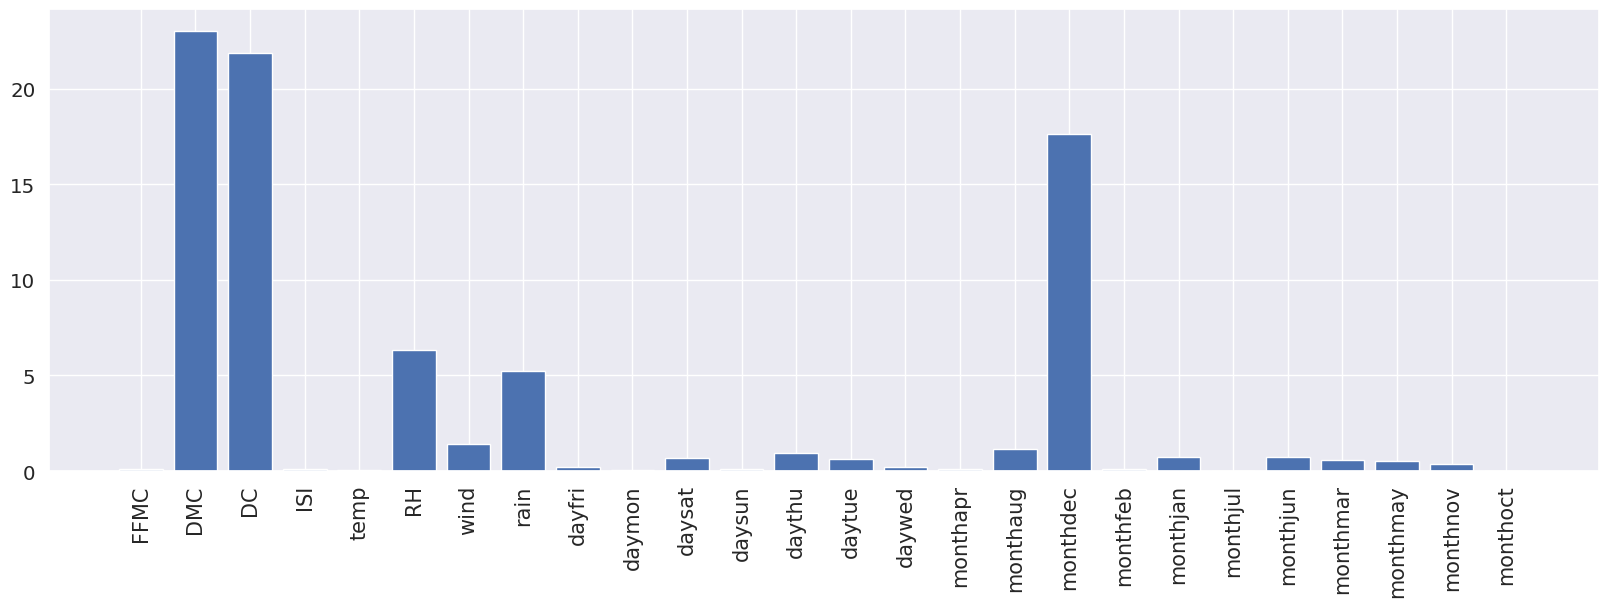

In [63]:
# [0,1,2,3,4,5,6,7,8]
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks(range(len(scores)))
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

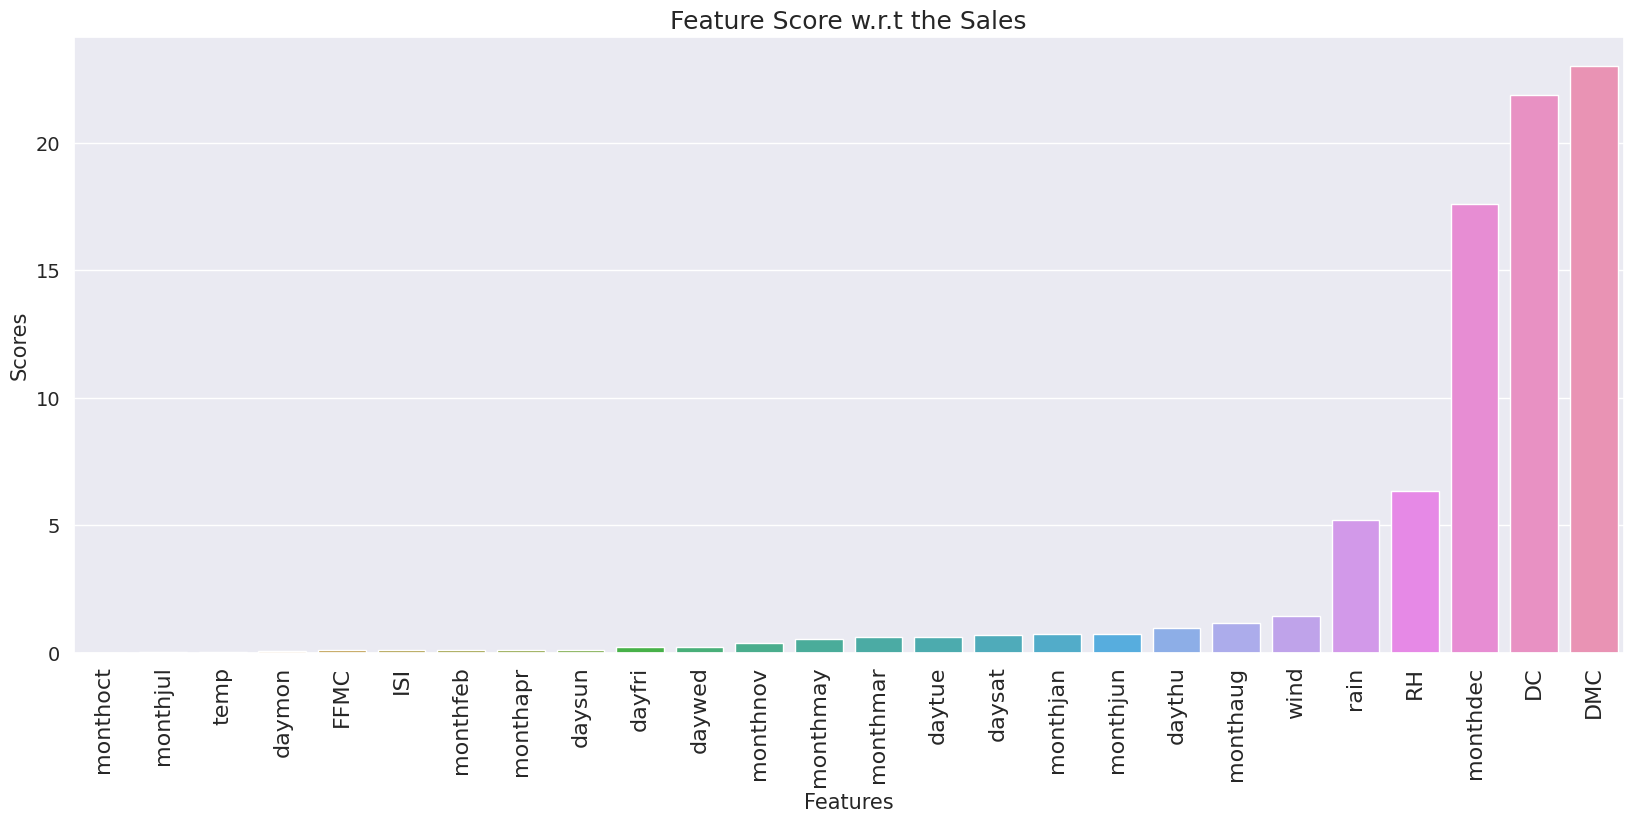

In [64]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score",
            data=score_df,
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [65]:
model_data=df[['DMC','DC','RH','rain','wind','area','month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep','size_category']]
model_data

,DMC,DC,RH,rain,wind,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,size_category
0,-1.323326,-1.830477,0.411724,-0.073268,1.498614,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
1,-1.179541,0.488891,-0.692456,-0.073268,-1.741756,-0.202020,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-1.049822,0.560715,-0.692456,-0.073268,-1.518282,-0.202020,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-1.212361,-1.898266,3.233519,0.603155,-0.009834,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.931043,-1.798600,3.356206,-0.073268,-1.238940,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.846648,0.474768,-0.753800,-0.073268,-0.736124,-0.100753,0,1,0,0,0,0,0,0,0,0,0,0,1
513,-0.846648,0.474768,1.638592,-0.073268,0.995798,0.651674,0,1,0,0,0,0,0,0,0,0,0,0,1
514,-0.846648,0.474768,1.577248,-0.073268,1.498614,-0.026532,0,1,0,0,0,0,0,0,0,0,0,0,1
515,0.549003,0.269382,-0.140366,-0.073268,-0.009834,-0.202020,0,1,0,0,0,0,0,0,0,0,0,0,0


 Test Train Split With Imbalanced Dataset
*Train Test Split* : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.



In [66]:
x = model_data.drop('size_category',axis=1)
y = model_data[['size_category']]
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3, stratify=y)
len(x_train.columns)

18

# yperparameter Tuning
7.1 Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons
Neuron
Neurons are the basic unit of a neural network. ... When the artificial neuron activates, it computes its state, by adding all the incoming inputs multiplied by its corresponding connection weight. But neurons always have one extra input, the bias, which is always 1, and has its own connection weight.

# Gradient Descent Optimizer
Imgur
GradientDescentOptimizer: It makes the best result with the least error
There are lots of optimizer methods provided in tensorflow. (GradientDescent, Adam, RMSProp, etc.)
learning rate : It indicates the degree of descending size.
Imgur

In [67]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

## Hyperparameter Tuning: Optimal Batch_size, Number of Epochs

In [68]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(64,input_dim=18,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(units=1,activation="sigmoid"))

    adam=Adam(learning_rate=0.01)
    model1.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model1

In [69]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(64,input_dim=18,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(units=1,activation="sigmoid"))

    adam=Adam(lr=0.01)
    model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model2

In [70]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(64,input_dim=18,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.0))
    model3.add(Dense(units=1,activation="sigmoid"))

    adam=Adam(lr=0.01)
    model3.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model3


Building Neural Networks Model using Optimal Values

In [71]:
def toFindBestParams(x_train, y_train, x_test, y_test):
    #print(y_test.shape)
    #sys.exit()

    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]

    # initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:

            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))

            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])

            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)

             # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]

            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(x_train, y_train, x_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.8421052694320679
batch_size: 5 - epochs: 10 Accuracy: 0.9335179924964905
batch_size: 5 - epochs: 50 Accuracy: 0.9916897416114807
batch_size: 5 - epochs: 100 Accuracy: 0.9861496090888977
batch_size: 10 - epochs: 5 Accuracy: 0.7783933281898499
batch_size: 10 - epochs: 10 Accuracy: 0.867035984992981
batch_size: 10 - epochs: 50 Accuracy: 0.9944598078727722
batch_size: 10 - epochs: 100 Accuracy: 0.9944598078727722
batch_size: 15 - epochs: 5 Accuracy: 0.7534626126289368
batch_size: 15 - epochs: 10 Accuracy: 0.811634361743927
batch_size: 15 - epochs: 50 Accuracy: 0.9889196753501892
batch_size: 15 - epochs: 100 Accuracy: 0.9944598078727722
batch_size: 20 - epochs: 5 Accuracy: 0.761772871017456
batch_size: 20 - epochs: 10 Accuracy: 0.7839335203170776
batch_size: 20 - epochs: 50 Accuracy: 0.9861496090888977
batch_size: 20 - epochs: 100 Accuracy: 0.9889196753501892


Training Model - using best params

In [72]:
 # create ANN model
model = Sequential()
# Defining the first layer of the model
model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
model.add(Dropout(0.1))
# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 model.add(Dropout(0.1))
 # The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
25/25 [==============================] - 3s 23ms/step - loss: 0.6887 - accuracy: 0.7344 - val_loss: 0.6847 - val_accuracy: 0.6833
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6727 - accuracy: 0.7635 - val_loss: 0.6660 - val_accuracy: 0.6833
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6365 - accuracy: 0.7635 - val_loss: 0.6309 - val_accuracy: 0.7083
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.5829 - accuracy: 0.7676 - val_loss: 0.5963 - val_accuracy: 0.7167
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.5404 - accuracy: 0.7718 - val_loss: 0.5780 - val_accuracy: 0.7167
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.5208 - accuracy: 0.7718 - val_loss: 0.5662 - val_accuracy: 0.7333
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5022 - accuracy: 0.7759 - val_loss: 0.5553 - val_accuracy: 0.7417
Epoch 8/100


## Model Evaluation Train and Test Error

In [73]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.1048 - accuracy: 0.9749
accuracy: 97.49%


In [74]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Check for overfitting and underfitting

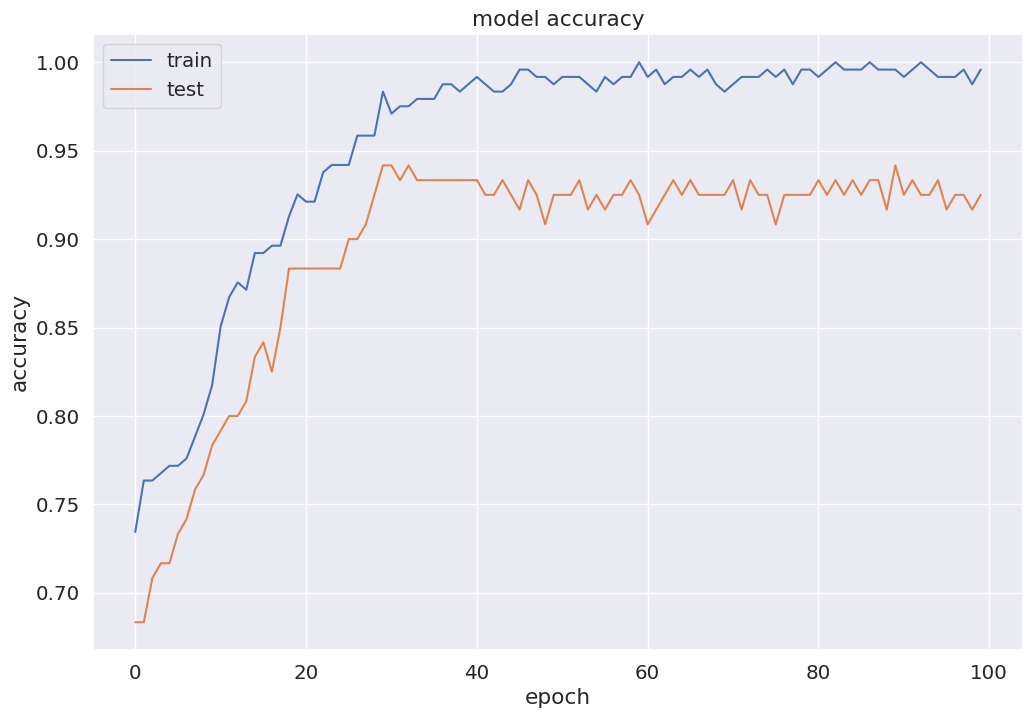

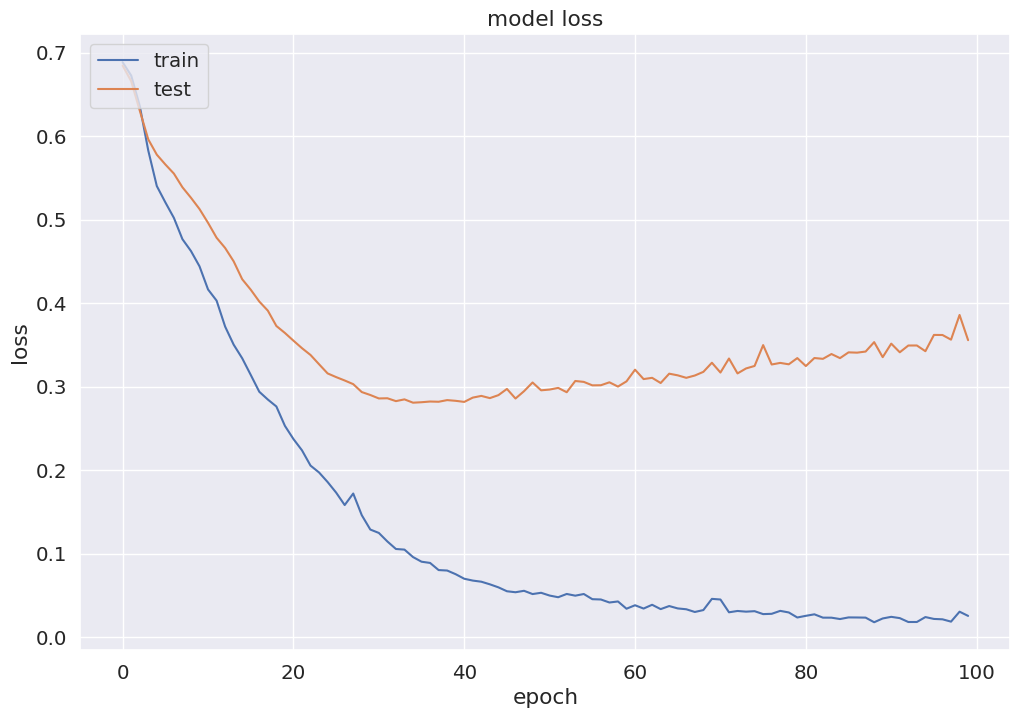

In [76]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Predicting values from Model using same dataset

In [77]:
# generating predictions for test data
y_predict_test = model.predict(x_test)

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test.size_category
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

5/5 [==============================] - 0s 4ms/step
(156, 3)


,Test_Actual,Test_Probability,Test_Predicted
493,1,0.997330,1
298,0,0.001545,0
93,0,0.001754,0
437,0,0.002177,0
340,0,0.048617,0
7,0,0.001935,0
172,0,0.003251,0
76,0,0.002414,0
148,0,0.001880,0
104,0,0.001583,0


In [78]:
# generating predictions for train data
y_predict_train = model.predict(x_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train.size_category
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

12/12 [==============================] - 0s 2ms/step
(361, 3)


,Train_Actual,Train_Probability,Train_Predicted
115,0,0.002408,0
130,0,0.002690,0
413,0,0.002002,0
350,0,0.013437,0
103,0,0.001785,0
511,0,0.001968,0
325,0,0.001973,0
473,1,0.997330,1
265,0,0.001706,0
226,1,0.997330,1


In [79]:
# print the classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score for Test Data    = ", np.round(accuracy_score(test_prediction['Test_Actual'],test_prediction['Test_Predicted']),2)*100,"%")
print("Confusion Matrix for Test Data  =\n", confusion_matrix(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))
print("Classification Report for Test Data  =\n", classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))

Accuracy score for Test Data    =  99.0 %
Confusion Matrix for Test Data  =
 [[112   2]
 [  0  42]]
Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       114
           1       0.95      1.00      0.98        42

    accuracy                           0.99       156
   macro avg       0.98      0.99      0.98       156
weighted avg       0.99      0.99      0.99       156



In [80]:
# print the scores on training and test set
y_predict_test = model.predict(x_test)
y_predict_train = model.predict(x_train)
print('Training set score: {:.2f}%'.format(accuracy_score(train_prediction['Train_Actual'], train_prediction['Train_Predicted'])*100))

print('Test set score: {:.2f}%'.format(accuracy_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])*100))

12/12 [==============================] - 0s 2ms/step
Training set score: 96.95%
Test set score: 98.72%


Confusion matrix
Table that describes the performance of a classification model

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

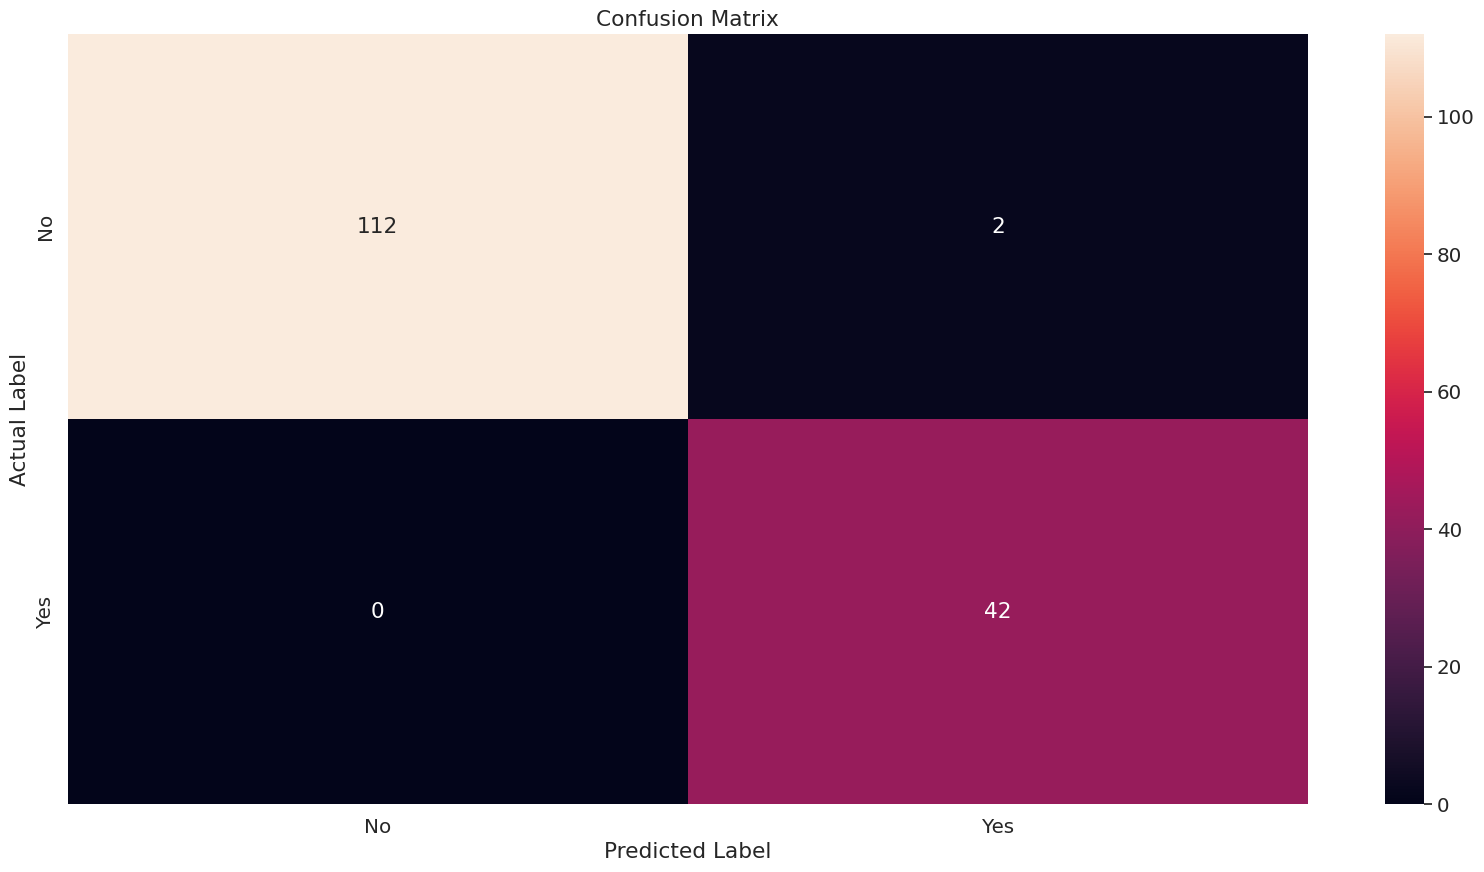

In [81]:
# plot confusion matrix to describe the performance of classifier.

cm_df=confusion_matrix(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

## ROC - AUC Curve
Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

### The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

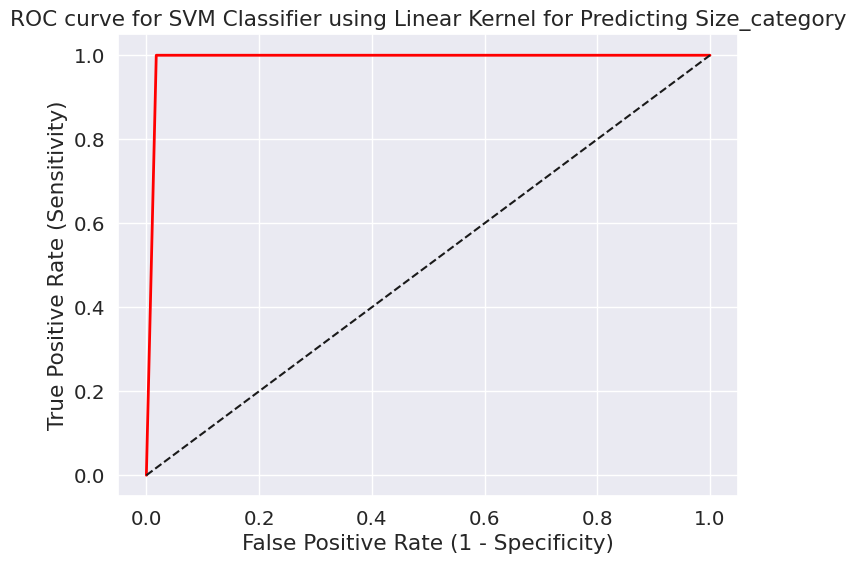

ROC AUC : 0.9912


In [82]:
fpr, tpr, thresholds = roc_curve(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])

print('ROC AUC : {:.4f}'.format(ROC_AUC))


Text(0, 0.5, 'Frequency')

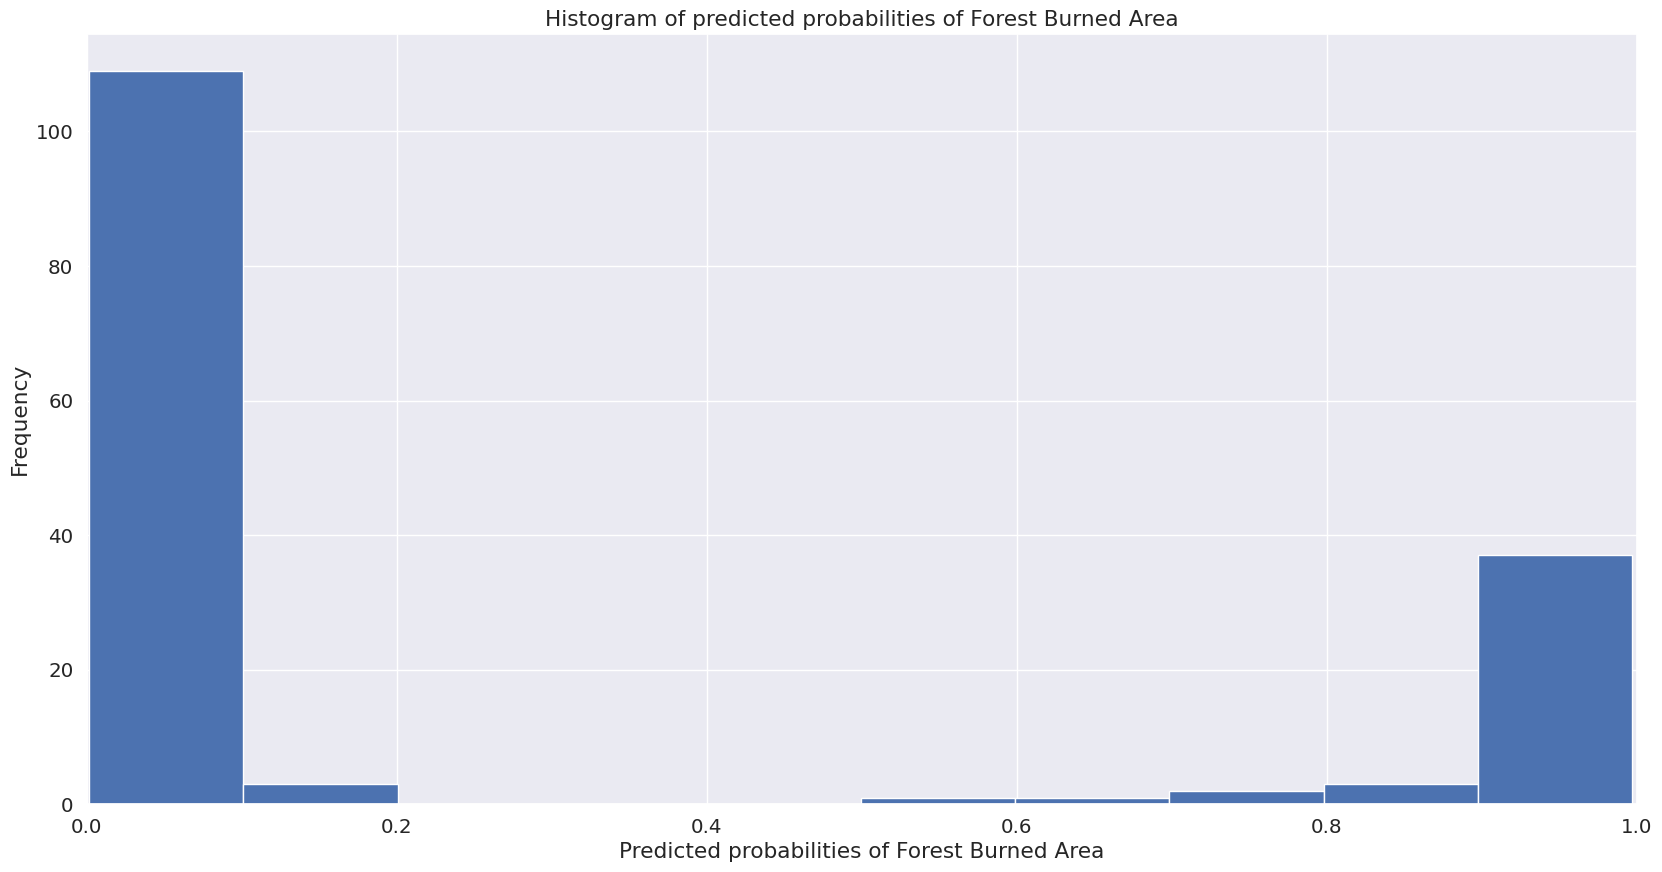

In [83]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(test_prediction['Test_Probability'], bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Forest Burned Area')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Forest Burned Area')
plt.ylabel('Frequency')